In [1]:
from src.modeling import *

%reload_ext autoreload
%autoreload 2

In [2]:
train_df = pd.read_pickle('data/KS_train_data.pkl')

train_df = train_df.set_index('id', drop = True)

test_df = pd.read_pickle('data/KS_test_data.pkl')
test_df = test_df.set_index('id', drop = True)

X_train = train_df.drop(columns = ['state', 'deadline', 'launched_at', 'converted_pledged_amount', 'spotlight', 'backers_count'])
y_train = train_df.state

X_test = test_df.drop(columns = ['state', 'deadline', 'launched_at', 'converted_pledged_amount', 'spotlight', 'backers_count'])
y_test = test_df.state

In [4]:
X_test

,country,currency,disable_communication,goal,is_starrable,staff_pick,category_parent_name,start_month,end_month,blurb_len
id,,,,,,,,,,
203250734,21,13,False,800.0,False,False,5,11,12,129
351956574,9,5,False,1000.0,False,False,1,1,1,98
1143575385,21,13,False,1200.0,False,False,12,7,8,117
1813304426,21,13,False,12000.0,False,False,0,2,3,135
1697791165,21,13,False,12000.0,False,False,7,7,8,125
...,...,...,...,...,...,...,...,...,...,...
974715721,21,13,False,21500.0,False,False,10,4,5,126
1989183133,21,13,False,2000000.0,False,False,6,9,11,114
43006751,21,13,False,7200.0,False,True,12,2,3,94


In [4]:
models = {'Log': LogisticRegression(), 'Knn': KNeighborsClassifier(), 'DT': DecisionTreeClassifier(random_state = 10), 
          'Gaussian': GaussianNB(), 'Multinomail': MultinomialNB(), 'LDA': LinearDiscriminantAnalysis(),
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

# #create stacked model
# new_models = stacked_model(models)

# # getting results and model
result_dict = test_models(X_train, y_train, models, n_jobs = 2)

save_cv_results(result_dict, 'models/VanillaResults_1.p')

Evaluating RF: 100%|██████████| 12/12 [49:44<00:00, 248.74s/it]       


'Done'

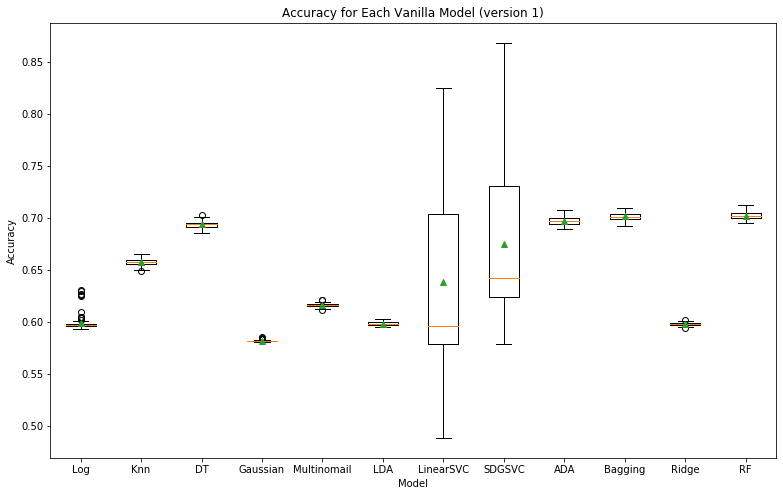

In [5]:
results = [i[1] for i in result_dict.items()]
model_names = [i for i in result_dict.keys()]
plot_model_results(results, model_names, 'models/VanillaResults_1', figure_title = 'Accuracy for Each Vanilla Model (version 1)', 
                   figsize = (13, 8))

In [6]:
models = {'Knn': KNeighborsClassifier(), 'DT': DecisionTreeClassifier(random_state = 10), 
          'Multinomail': MultinomialNB(), 'LDA': LinearDiscriminantAnalysis(),
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
# new_models = stacked_model(models)

# getting results and model
result_dict = test_models(X_train, y_train, models, n_jobs = 2)

save_cv_results(result_dict, 'models/VanillaResults_2.p')

Evaluating RF: 100%|██████████| 7/7 [26:04<00:00, 223.50s/it]        


'Done'

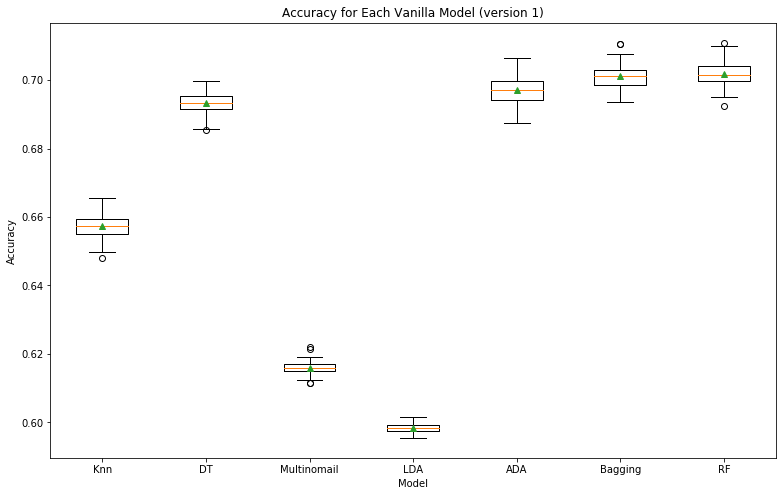

In [7]:
results = [i[1] for i in result_dict.items()]
model_names = [i for i in result_dict.keys()]
plot_model_results(results, model_names, 'models/VanillaResults_2', figure_title = 'Accuracy for Each Vanilla Model (version 1)', 
                   figsize = (13, 8))

In [7]:
models = {'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'RF': RandomForestClassifier(random_state = 10), 'GradientBoost' : GradientBoostingClassifier(random_state = 10)}

#create stacked model
new_models = stacked_model(models)

# getting results and model
result_dict = test_models(X_train, y_train, new_models, n_jobs = 2)

save_cv_results(result_dict, 'models/VanillaResults_4.p')


Evaluating STACKED: 100%|██████████| 5/5 [1:49:04<00:00, 1309.00s/it]


'Done'

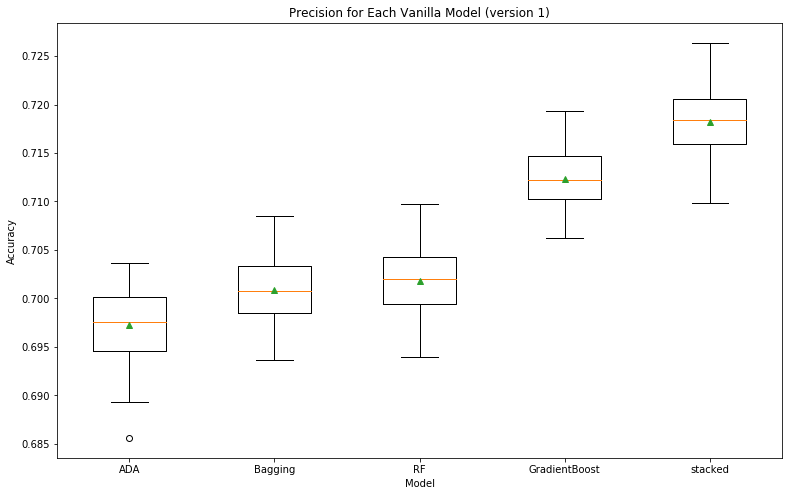

In [9]:
results = [i[1] for i in result_dict.items()]
model_names = [i for i in result_dict.keys()]
plot_model_results(results, model_names, 'models/VanillaResults_4', figure_title = 'Precision for Each Vanilla Model (version 1)', 
                   figsize = (13, 8))

In [10]:
#These four classifiers will be tuned to be more accurate :)